In [13]:
%pip install dtw-python
%pip install matplotlib
%pip install datetime
%pip install requests
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import requests as req

In [15]:
import statistics
from typing import List
import requests as req

class Yahoo:
    def __init__(self):
        pass
    
    
    def get_chart(self,symbol:str)->list:
        headers = {
            'x-api-key': "mTd2MNVwEe3WFgj5PQ66Tbpq0CyeP8Q7ESjpmYZ2"
        }
        try:
            url = f"https://yfapi.net/v8/finance/chart/{symbol}?range=1mo&region=FR&interval=1d&lang=en"
            response = req.request("GET", url, headers=headers)
            return response.json()["chart"]["result"][0]["indicators"]["quote"][0]['close']
        
        except Exception as error:
            return error
        
    def resultats_rapports(self,list_actifs:List[str]) -> dict:
        results = {}
        
        # On construit un dictionnaire avec tous les charts des actifs de la liste
        charts = {actif: self.get_chart(actif) for actif in list_actifs}
        
        
        
        # Pour chaque actif 
        for actif_reference in charts:
            for actif_comparaison in charts:
                results[
                    f"distance rapport premiere valeur {actif_reference} "
                    + actif_comparaison
                ] = self.distance_rapport_premiere_valeur(
                    charts[actif_reference], charts[actif_comparaison]
                )

                results[
                    f"distance rapport moyenne {actif_reference} "
                    + actif_comparaison
                ] = self.distance_rapport_moyenne(
                    charts[actif_reference], charts[actif_comparaison]
                )
        
        return results                


    def distance_rapport_premiere_valeur(self,reference,comparison):  
        newreference = []
        newcomparison = []

        for i in range(len(reference)):
            newreference.append(reference[i] / reference[0])
            newcomparison.append(comparison[i] / comparison[0]) 

        distances = [
            abs(newreference[i] - newcomparison[i])
            for i in range(len(newreference))
        ]

        return {"somme":round(sum(distances),2),
                "moyenne":round(statistics.mean(distances),2)}
    
    def distance_rapport_moyenne(self,reference,comparison):          
        newreference = []
        newcomparison = []

        for i in range(len(reference)):
            newreference.append(reference[i] / statistics.mean(reference))
            newcomparison.append(comparison[i] / statistics.mean(comparison)) 

        distances = [
            abs(newreference[i] - newcomparison[i])
            for i in range(len(newreference))
        ]

        return {"somme":round(sum(distances),2),
                "moyenne":round(statistics.mean(distances),2)}
    
    
    


In [16]:
## Finding two different dataset

# Getting Apple chart
reference = Yahoo().get_chart("AAPL")
print (reference)

# Getting Microsoft chart
comparison = Yahoo().get_chart("MSFT")
print (comparison)

[164.32000732421875, 160.07000732421875, 162.74000549316406, 164.85000610351562, 165.1199951171875, 163.1999969482422, 166.55999755859375, 166.22999572753906, 163.1699981689453, 159.3000030517578, 157.44000244140625, 162.9499969482422, 158.52000427246094, 154.72999572753906, 150.6199951171875, 155.08999633789062, 159.58999633789062, 160.6199951171875, 163.97999572753906, 164.8800048828125]
[287.7200012207031, 280.2699890136719, 294.5899963378906, 297.30999755859375, 298.7900085449219, 294.95001220703125, 300.19000244140625, 295.9200134277344, 289.8599853515625, 278.9100036621094, 275.8500061035156, 288.5, 285.5899963378906, 280.07000732421875, 276.44000244140625, 287.1499938964844, 294.3900146484375, 295.2200012207031, 300.42999267578125, 297.8399963378906]


In [17]:
distances = []
for i in range (0,len(reference)):
    distance = abs(reference[i]-comparison[i])
    distances.append(distance)

print(distances)

[123.39999389648438, 120.19998168945312, 131.84999084472656, 132.45999145507812, 133.67001342773438, 131.75001525878906, 133.6300048828125, 129.6900177001953, 126.68998718261719, 119.61000061035156, 118.41000366210938, 125.55000305175781, 127.06999206542969, 125.34001159667969, 125.82000732421875, 132.05999755859375, 134.80001831054688, 134.60000610351562, 136.4499969482422, 132.95999145507812]


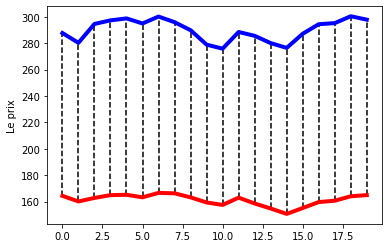

In [18]:
from pylab import *
for i in range (0,len(reference)):
    x = [i,i]
    y = [reference[i],comparison[i]]
    plot(x, y,"k--")
x = np.linspace(0, len(reference)-1, len(reference))



plot(x, reference, "r", linewidth=4)
plot(x, comparison,"b",linewidth=4)
ylabel("Le prix")

plt.show()

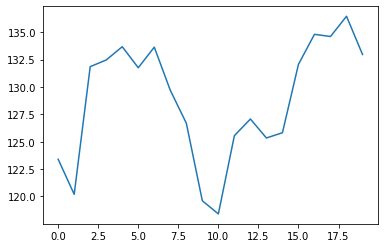

2576.010025024414
128.8005012512207


In [19]:
x = np.linspace(0, len(reference)-1, len(reference))
plot(x,distances)
plt.show()

import statistics
print(sum(distances))
print(statistics.mean(distances))

128.8005012512207


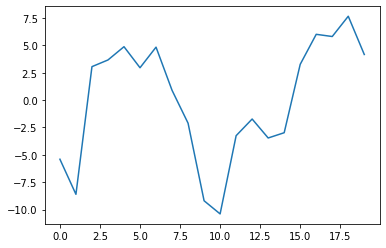

In [20]:
import statistics

moyenne = statistics.mean(distances)
print(moyenne)
variationsDistance = []
for i in range (0,len(reference)):
    valeur = distances[i] - moyenne
    variationsDistance.append(valeur)
    
plot(x,variationsDistance)
plt.show()

In [21]:
resultat = abs(statistics.mean(variationsDistance))
print(resultat)

5.684341886080802e-15


# On comparer les jeux en ramenant à 0 par rapport à la premiere valeur

131.9701385498047
6.598506927490234


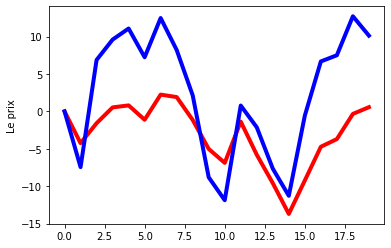

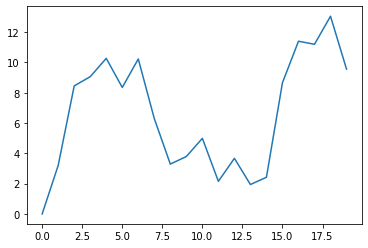

In [22]:
newreference = []
newcomparison = []

for i in range (0,len(reference)):
    newreference.append(reference[i] - reference[0])
    newcomparison.append(comparison[i] - comparison[0]) 


distances = []
for i in range (0,len(newreference)):
    distance = abs(newreference[i]-newcomparison[i])
    distances.append(distance)
    
    
import statistics
print(sum(distances))
print(statistics.mean(distances))

plot(x, newreference, "r", linewidth=4)
plot(x, newcomparison,"b",linewidth=4)
ylabel("Le prix")

plt.show()


x = np.linspace(0, len(reference)-1, len(reference))
plot(x,distances)
plt.show()

# On fait le rapport par rapport à la première valeur (reference)

0.5385200455649103
0.026926002278245514


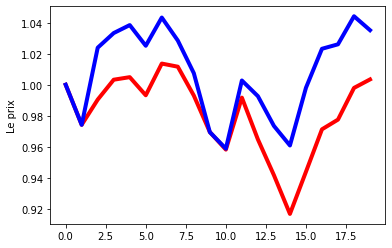

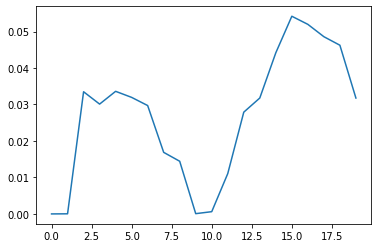

In [23]:
newreference = []
newcomparison = []

for i in range (0,len(reference)):
    newreference.append(reference[i] / reference[0])
    newcomparison.append(comparison[i] / comparison[0]) 


distances = []
for i in range (0,len(newreference)):
    distance = abs(newreference[i]-newcomparison[i])
    distances.append(distance)
    
    
import statistics
print(sum(distances))
print(statistics.mean(distances))

plot(x, newreference, "r", linewidth=4)
plot(x, newcomparison,"b",linewidth=4)
ylabel("Le prix")

plt.show()


x = np.linspace(0, len(reference)-1, len(reference))
plot(x,distances)
plt.show()

In [24]:
assets = ['TSLA','AMZN','MSFT','AAPL']


from pprint import pprint

pprint(Yahoo().resultats_rapports(assets))

TypeError: 'KeyError' object is not subscriptable

In [ ]:
class MBOUM:
    def __init__(self):
        pass
    
    
    def get_chart(self,symbol:str,timeframe=20) -> list:
        headers = {
            'X-Mboum-Secret': "DPEbphxr0mBRzEp956ORDzCn1DFQMX6Xhhf1g5GVw6t6LtJlNmkwmYDGKVed"
        }
        try:
            url = f"https://mboum.com/api/v1/hi/history/?symbol={symbol}&interval=1d&diffandsplits=true"
            response = req.request("GET", url, headers=headers).json()

            """
            result = [
                {
                    "date": datetime.fromtimestamp(int(value)),
                    "value": response[value]["close"],
                }
                for value in response
            ]
            """
            result = [ response['data']['items'][value]["close"] for value in response['data']['items']]

            return result[:timeframe]

        except Exception as error:
            print(response)
            raise error
        
    def resultats_rapports(self,list_actifs:List[str]) -> dict:
        results = {}
        
        # On construit un dictionnaire avec tous les charts des actifs de la liste
        charts = {actif: self.get_chart(actif) for actif in list_actifs}
        
        
        
        # Pour chaque actif 
        for actif_reference in charts:
            for actif_comparaison in charts:
                results[
                    f"distance rapport premiere valeur {actif_reference} "
                    + actif_comparaison
                ] = self.distance_rapport_premiere_valeur(
                    charts[actif_reference], charts[actif_comparaison]
                )

                results[
                    f"distance rapport moyenne {actif_reference} "
                    + actif_comparaison
                ] = self.distance_rapport_moyenne(
                    charts[actif_reference], charts[actif_comparaison]
                )
        
        return results                


    def distance_rapport_premiere_valeur(self,reference,comparison):  
        newreference = []
        newcomparison = []

        for i in range(len(reference)):
            newreference.append(reference[i] / reference[0])
            newcomparison.append(comparison[i] / comparison[0]) 

        distances = [
            abs(newreference[i] - newcomparison[i])
            for i in range(len(newreference))
        ]

        return {"somme":round(sum(distances),2),
                "moyenne":round(statistics.mean(distances),2)}
    
    def distance_rapport_moyenne(self,reference,comparison):          
        newreference = []
        newcomparison = []

        for i in range(len(reference)):
            newreference.append(reference[i] / statistics.mean(reference))
            newcomparison.append(comparison[i] / statistics.mean(comparison)) 

        distances = [
            abs(newreference[i] - newcomparison[i])
            for i in range(len(newreference))
        ]

        return {"somme":round(sum(distances),2),
                "moyenne":round(statistics.mean(distances),2)}

In [ ]:
assets = ['TSLA','AMZN','MSFT','AAPL']


from pprint import pprint

pprint(MBOUM().resultats_rapports(assets))